# Интервальные оценки с помощью квантилей

#### Правило  двух сигм
Если у нас есть нормально распределенная случайная величина, то 95% ее вероятностной массы приходится на интевал $[\mu -2\sigma,\mu +2\sigma]
$$X \sim N(\mu,\theta^2)\Rightarrow P(\mu-2\theta) \leq X\leq\mu+2\theta)\approx0.95$
![2sigm](../img/2sigm.png)



Во первых, эта оценка не точна,во вторых, хочется получить оценки не только для 95% интервала.<br>
**Квантиль** порядка $a\in(0,1)$ -такое число $X_a$,что:<br>$$P(X\leq X_a)\geq a$$ 
$$P(X\geq X_a)\geq 1-a$$


#### Уточнение правила двух сигм
$P(X_{0.0025}\leq X\leq X_{0.975})=0.95$ (по определению квантиля)<br>
обобщаем:
#### Предсказательный интервал
$X\sim F(x)\Longrightarrow P(X_{\frac{\alpha}{2}}\leq X\leq X_{1-\frac{\alpha}{2}})=1-\alpha)$<br>
$[X_{\frac{\alpha}{2}}, X_{1-\frac{\alpha}{2}}]$ - предсказательный интервал порядка 1-$\alpha$ ($\alpha$ -квантиль)

##### для нормального распределения
$X \sim N(\mu,\theta^2)\Longrightarrow P(\mu-\theta z_{1-\frac{\alpha}{2}}) \leq X\leq\mu+\theta z_{1-\frac{\alpha}{2}})=1-\alpha$<br>
$z_\alpha$- квантиль стандартного нормального распределения $N(0,1)$

In [1]:
#расчёт z_a 
import scipy.stats
scipy.stats.norm.ppf(0.975)

1.959963984540054

$1.959963984540054 \sim 2$ отсюда правило двух сигм
### Точечные оценки
Пусть у нас есть случайчая величина X, функция распределения которой зависит от параметра $\theta$<br>
$X ~F(x,\theta),\theta$-неизвестный параметр <br>
$\theta=?$<br>
собираем выборку $X^n=(X_1,...,X_n)$<br>
$\hat\theta$<br> -оценка $\theta$ по выборке<br>
Например, для $\theta=\mathbb{E}X:$<br>
 $\hat\theta=\bar X_n=\frac{1}{n} \sum_{i=1}^n X_i$ 
### Доверительные интервалы
Доверительный интервал для параметра $\theta$ - пара таких статистик $C_L,C_U$,что <br>
$P(C_L\leq\theta\leq C_U)\geq 1-\alpha$,$1-\alpha$-уровень доверия
Как $C_L$ и $C_U$ (вепхний и нижний доверительные пределы оценивать по выборке?<br>
Если $\hat \theta$ -оценка $\theta$ и известно распределение $F_{\hat \theta(x)}$, то достаточно взять соответсвующие квантили<br>
$P\Bigg(F_{\hat \theta}^{-1}\Big(\frac{\alpha}{2}\Big)\leq\theta\leq F_{\hat \theta}^{-1}\Big(\frac{1-\alpha}{2}\Big)\Bigg)=1-\alpha$<br>
##### Для нормального распределения:
$X \sim N(\mu,\theta^2),X^n=(X_1,...,X_n)$<br>
$\bar{X_n}$- выборочное среднее(оценка мат.ожидания $\mu$)<br>
<br>
Предсказательный интервал для $X_n$<br>
$\bar{X_n}\sim N\Big(\mu,\frac{\theta^2}{n}\Big)\Longrightarrow P\Big(\mu-\frac{\theta}{\sqrt{n}} z_{1-\frac{\alpha}{2}} \leq \bar{X_n}\leq\mu+\frac{\theta}{\sqrt{n}} z_{1-\frac{\alpha}{2}}\Big)=1-\alpha$

<br>
Доверительный интервал для $\mu :$<br>
$P\Big(\bar{X_n}-\frac{\theta}{\sqrt{n}} z_{1-\frac{\alpha}{2}} \leq \mu\leq\bar{X_n}+\frac{\theta}{\sqrt{n}} z_{1-\frac{\alpha}{2}}\Big)=1-\alpha$
<br>**Резюме:**
В предсказательном интервале границы не случайны, а случайно то, что между.<br>В доверильном- все наооборот.

Если мы хотим как то оценивать доверительный интервал по выборке,мы должны избавиться от $\mu$ в его границах, и лучшее, что можно сделать, заменить его на выборочное среднее.<br>
Предсказательный интервал измеряет диапазон, в котором меняется случайная величина, а доверительный интервал для среднего показывает в каком диапазоне находится среднее.
##### Для любого распределения:
$X \sim F(x),X^n=(X_1,...,X_n)$<br>
$\bar{X_n}$- оценка $\mathbb{E}X$<br>
$\bar{X_n}\approx\sim N\Big (\mathbb{E}X,\frac{\mathbb{D}X}{n}\Big )$(ЦПТ)$\Rightarrow$<br>
Доверительный интервал для $\mathbb{E}X$:
$$P\Big (\bar{X_n} -z_{1-\frac{\alpha}{2}}\sqrt{\frac{\mathbb{D}X}{n}}\leq\mathbb{E}X\leq \bar{X_n} +z_{1-\frac{\alpha}{2}}\sqrt{\frac{\mathbb{D}X}{n}}\Big )\approx 1-\alpha$$

### Доверительные интервалы практика
#### Постановка задачи:
Имеются сгененированный случайно набор точек и 2 классификатора.<br>
Необходимо их оценить.

In [2]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split,cross_val_score
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


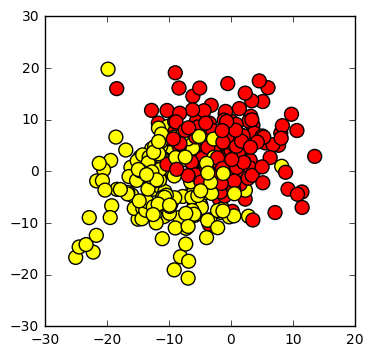

In [3]:
#генерация данных
blobs = datasets.make_blobs(300, centers = 2, cluster_std = 6, random_state=1)
pylab.figure(figsize(4, 4))
pylab.scatter(list(map(lambda x: x[0], blobs[0])), list(map(lambda x: x[1], blobs[0])), c = blobs[1], cmap = 'autumn',
             s=100);

In [4]:
#разбиваем данные на обучение и тест
train_data, test_data, train_labels, test_labels = train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 15,
                                                                                    random_state = 1)

#### Точечная оценка

In [5]:
ridge_model = linear_model.RidgeClassifier()
ridge_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, ridge_model.predict(test_data))

0.88888888888888884

In [6]:
sgd_model = linear_model.SGDClassifier(random_state = 0)
sgd_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, sgd_model.predict(test_data))

0.88888888888888884

Видим,оценки совпадают.<br> Попробуем оценку уточнить
#### Оценка среднего
###### Точечная оценка среднего

In [7]:
sgd_auc_scores = cross_val_score(linear_model.SGDClassifier(), 
                                 blobs[0], blobs[1], scoring = 'roc_auc',  
                                 cv = 20)
ridge_auc_scores = cross_val_score(linear_model.RidgeClassifier(), 
                                 blobs[0], blobs[1], scoring = 'roc_auc',  
                                 cv = 20) 
print("sgd model auc: mean %.3f, std %.3f" % (sgd_auc_scores.mean(), sgd_auc_scores.std(ddof=1)))
print("ridge model auc: mean %.3f, std %.3f" % (ridge_auc_scores.mean(), ridge_auc_scores.std(ddof=1)))

sgd model auc: mean 0.931, std 0.057
ridge model auc: mean 0.948, std 0.054


Видим, что оценки не одинаковы и модели работают по разному.Мы получили точечную оценку среднего и давайте посмотрим, в каких диапазонах она может изменяться.
#### Интервальная оценка среднего
Рассмотрим два метода:
##### z -интервал

In [8]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

Для построения z интевала нужно знать оценку дисперсии.<br>
Допустим, нам откуда-то известно, что дисперсия auc_scores $\sigma^2=0.25$. <br>Построим доверительные интервалы для средних вида $$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

In [9]:
sgd_mean = sgd_auc_scores.mean()
ridge_mean = ridge_auc_scores.mean()
print ("sgd model mean auc 95%% confidence interval", _zconfint_generic(sgd_mean, 
                                                                  sqrt(0.25/len(sgd_auc_scores)), 
                                                                  0.05, 'two-sided'))

print ("ridge model mean auc 95%% confidence interval", _zconfint_generic(ridge_mean, 
                                                                    sqrt(0.25/len(sgd_auc_scores)), 
                                                                    0.05, 'two-sided'))

sgd model mean auc 95%% confidence interval (0.71197586995789552, 1.1502371402461862)
ridge model mean auc 95%% confidence interval (0.72886043628442598, 1.1671217065727166)


#### t-интервал
Вместо гипотетической теоретической дисперсии $\sigma^2$, которую мы на самом деле в данном случае не знаем, используем выборочные дисперсии, и построим доверительные интервалы вида $$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [10]:
# расчитываем выборочную дисперсию
sgd_mean_std = sgd_auc_scores.std(ddof=1)/sqrt(len(sgd_auc_scores))
ridge_mean_std = ridge_auc_scores.std(ddof=1)/sqrt(len(ridge_auc_scores))

#len(sgd_auc_scores) - 1 - число степеней свободы, -1 тк одну уже использовали для вычисления дисперсии
print ("sgd model mean auc 95%% confidence interval", _tconfint_generic(sgd_mean, sgd_mean_std,
                                                                       len(sgd_auc_scores) - 1,
                                                                       0.05, 'two-sided')
)
print ("ridge model mean auc 95%% confidence interval", _tconfint_generic(ridge_mean, ridge_mean_std,
                                                                         len(sgd_auc_scores) - 1,
                                                                         0.05, 'two-sided'))

sgd model mean auc 95%% confidence interval (0.9043588628325141, 0.9578541473715676)
ridge model mean auc 95%% confidence interval (0.92287832593023689, 0.97310381692690573)


видим, что интревалы получились уже, и ridge model немнго лучше
#### Доверительные интервалы для доли
**Постановка задачи:**
Оценка доли успехов генеральной совокупности по выборке.<br>Работать будем с бинарными данными (1 - успех, 0-неудача).<br>
Необходимо оценить долю успехов по выборке.

In [11]:
np.random.seed(1)
statistical_population = np.random.randint(2, size = 100000) 
#случайная подвыборка(по ней будем оценивать)
random_sample = np.random.choice(statistical_population, size = 1000)
#истинное значение доли
statistical_population.mean()

0.49770999999999999

###### Точечная оценка доли

In [12]:
#выборочное среднее
random_sample.mean()

0.502

часто такой оценки недостаточно
##### Доверительный интервал на основе нормального распределения
$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [13]:
from statsmodels.stats.proportion import proportion_confint
# аргументы proportion_confint: количество успехов нашей подвыборки, размер  подвыборки и метод
#method = 'normal' -нормальное распределение
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')
print ('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.471010, 0.532990] with width 0.061979


попробуем улучшить оценку
##### Доверительный интервал Уилсона
хорош в крайних случаях.<nr>
Неплох, когда выборка мала или принимает крайние значения (0 или 1)
$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [14]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

print ('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.471062, 0.532922] with width 0.061860


не видим особых преимуществ, тк наша подвыборка довольно хорошо.<br>
Иногда мы хотим получить оценку заданной ширины и знать сколько нужно событий для этого.
#### Размер выборки для интервала заданной ширины

In [15]:
from statsmodels.stats.proportion import samplesize_confint_proportion
#0.01- половина ширины желаемого интервала
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01,alpha=0.05)))
n_samples

9604

In [16]:
#таким образом, чтобы получить оценку более точно, нужно взять  подвыборку почти 10 раз больше
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')
print ('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.481776, 0.501773] with width 0.019997


#### Доверительные интервалы для двух долей 
**Постановка задачи:**
Имеются 2 рекламных баннера,нужно проверить ,какой больше нравится людям.<br>
1000 людям покажем баннеры, если баннер нравится, человек ставит лайк.
Нужно понять какой баннер лучше.

In [17]:
import numpy as np
import pandas as pd
import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [18]:
data = pd.read_csv(r'..\data\banner_click_stat.txt', header = None, sep = '\t')
data.columns = ['banner_a', 'banner_b']

In [19]:
data.head()

,banner_a,banner_b
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [20]:
data.describe()

,banner_a,banner_b
count,1000.000000,1000.000000
mean,0.037000,0.053000
std,0.188856,0.224146
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


Так доля кликов небольшая,воспользуемся **методом Уилсона**
$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [21]:
conf_interval_banner_a = proportion_confint(sum(data.banner_a), 
                                            data.shape[0],
                                            method = 'wilson')
conf_interval_banner_b = proportion_confint(sum(data.banner_b), 
                                            data.shape[0],
                                            method = 'wilson')
print ('interval for banner a [%f, %f]' % conf_interval_banner_a)
print( 'interval for banner b [%f, %f]' % conf_interval_banner_b)

interval for banner a [0.026961, 0.050582]
interval for banner b [0.040747, 0.068675]


Получились интервалы достаточно узкие, но пересекающиеся и не понятно как их сравнить.
### Доверительный интервал для разности долей (независимые выборки)
   | $X_1$ | $X_2$  
  ------------- | -------------|
  1  | a | b 
  0  | c | d 
  $\sum$ | $n_1$| $n_2$
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

In [22]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)
print ("confidence interval: [%f, %f]" % proportions_confint_diff_ind(data.banner_a, data.banner_b))

confidence interval: [-0.034157, 0.002157]


0 лежит внутри и по прежнему непонятно, лучше ли новый баннер старого.
#### Доверительный интервал для разности долей (связанные выборки)
Предположим оба баннера смотрели одни и теже люди.<br>


 $X_1$ \ $X_2$ | 1| 0 | $\sum$
  ------------- | -------------|
  1  | e | f | e + f
  0  | g | h | g + h
  $\sum$ | e + g| f + h | n  
  
$$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

In [23]:
def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)
print ("confidence interval: [%f, %f]" % proportions_confint_diff_rel(data.banner_a, data.banner_b))

confidence interval: [-0.026689, -0.005311]


таким образом, новый интервал действительно лучше чем старый(интервал полностью меньше 0)
# Доверительные интервалы на основе bootstrap
Часто нужно построить оценку для статистики, про распределение которой ничего не известно.
В принципе это может быть любая функция, которую можно подсчитать от выборки.

Чтобы построить доверительный интервал для статистики $T_n=T(X^n)$ , нужно знать ее выборочное распределение $F_{T_n(x)}$
Как его получить?

**Наивный метод**:<br>
Извлечь из генеральной совокупности **N** выборок объема **n** и оценить распредеоение $T_n$ эмпирически
![bootstrap](../img/bootstrap.png)
Но этот способ скорее теоретический чем практический.
**Параметрический метод**:<br>
Сделать предположение, что $X$ распределена по закону $F_X(x)$ ,при выполнении которого закон распределения $T_n$ известен
![bootstrap](../img/param.png)
Так же непонятно , как выбрать T.<br>
**Bootstrap**:<br>
Сгенерировать $N$ "псевдовыборок" объема $n$ и оценить выборочное распределение "псевдоэпирически"
![bootstrap](../img/bootstrap2.png)

**Постановка задачи:**
Verizon — основная региональная телекоммуникационная компания (Incumbent Local Exchange Carrier, ILEC) в западной 
части США. В связи с этим данная компания обязана предоставлять сервис ремонта телекоммуникационного оборудования 
не только для своих клиентов, но и для клиентов других локальных телекоммуникационых компаний (Competing Local Exchange Carriers, CLEC). При этом в случаях, когда время ремонта оборудования для клиентов других компаний существенно выше, чем для собственных, Verizon может быть оштрафована.<br>
нужно проверить это

In [24]:
data = pd.read_csv(r'..\data\verizon.txt', sep='\t')
data.head()

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


In [25]:
data.Group.value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

Таким образом,по клиентам  компании Verizon существенно больше информации .

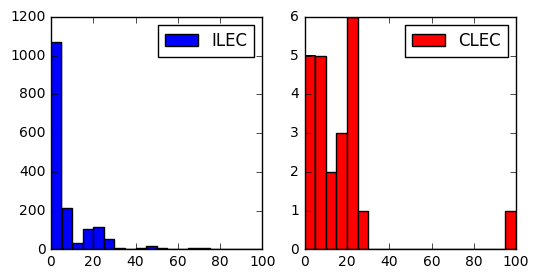

In [26]:
pylab.figure(figsize(6, 3))
pylab.subplot(1,2,1)
pylab.hist(data[data.Group == 'ILEC'].Time, bins = 20, color = 'b', range = (0, 100), label = 'ILEC')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(data[data.Group == 'CLEC'].Time, bins = 20, color = 'r', range = (0, 100), label = 'CLEC')
pylab.legend()

pylab.show()

In [27]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

##### Интервальная оценка медианы
получим независимые оценки медианы

In [28]:
ilec_time = data[data.Group == 'ILEC'].Time.values
clec_time = data[data.Group == 'CLEC'].Time.values

In [29]:
np.random.seed(0)
ilec_median_scores = list(map(np.median, get_bootstrap_samples(ilec_time, 1000)))
clec_median_scores = list(map(np.median, get_bootstrap_samples(clec_time, 1000)))
print ("95% confidence interval for the ILEC median repair time:",  stat_intervals(ilec_median_scores, 0.05))
print ("95% confidence interval for the CLEC median repair time:",  stat_intervals(clec_median_scores, 0.05))

95% confidence interval for the ILEC median repair time: [ 3.18     3.82525]
95% confidence interval for the CLEC median repair time: [  5.79125  20.     ]


видим, что интервал для клиентов компании лежит левее интервала для клиентов других компаний
##### Точечная оценка разности медиан

In [30]:
print ("difference between medians:", np.median(clec_time) - np.median(ilec_time))

difference between medians: 10.74


##### Интервальная оценка разности медиан

In [31]:
delta_median_scores = list(map(lambda x: x[1] - x[0], list(zip(ilec_median_scores, clec_median_scores))))
print ("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [  2.04975  16.63   ]
